# Modeling Drug Decay with a two compartment model.

- An issue encountered here is how to convert this drug decay/ drug concentration to an parameter value for the effectiveness of the drug in the body. Maybe its a linear affect? 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
def model(z,t):
    A = z[0]
    B = z[1]
    
    dAdt = -e*A - d*A
    dBdt = e*A-k*B - d*B
    dadt = dBdt*(1/1.8)
    
    dzdt = [dAdt, dBdt,dadt]
    return dzdt


In [7]:
#initial conditions, there are three
z0 = [10,0,0]

#number of time points
tn = 501

#time points
t = np.linspace(0,50, tn)

#step input - this is where the drug changes the activation rate alpha
e = .5
k = .4
d = .7


#store solutions
A = np.empty_like(t)
B = np.empty_like(t)
a = np.empty_like(t)

#record intial
A[0] = z0[0]
B[0] = z0[1]
a[0] = z0[2]



#Solve the ODE - in this here, I can actually add drug doses but modifying the z0 intial condition!
for i in range(1,tn):
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan)
    # store solution for plotting
    A[i] = z[1][0]
    B[i] = z[1][1]
    a[i] = z[1][2]
    
    # next initial condition
    z0 = z[1] 





Text(0,0.5,'Drug Concentration')

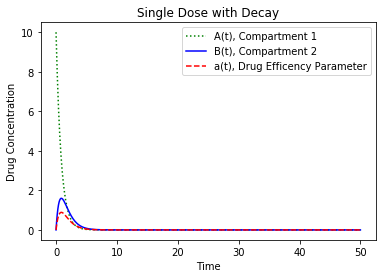

In [8]:
fig, ax = plt.subplots()
plt.plot(t,A,'g:',label='A(t), Compartment 1')
plt.plot(t,B,'b-',label='B(t), Compartment 2')
plt.plot(t,a,'r--', label ='a(t), Drug Efficency Parameter' )
plt.legend()
plt.title('Single Dose with Decay')
plt.xlabel('Time')
plt.ylabel('Drug Concentration')

## Add Doses

In [9]:
#initial conditions, there are three
z0 = [10,0,0]

#number of time points
tn = 501

#time points
t = np.linspace(0,50, tn)

#step input - this is where the drug changes the activation rate alpha
e = .5
k = .4



#store solutions
A = np.empty_like(t)
B = np.empty_like(t)
a = np.empty_like(t)

#record intial
A[0] = z0[0]
B[0] = z0[1]
a[0] = z0[2]


z1 = z0

#Solve the ODE - in this here, I can actually add drug doses but modifying the z0 intial condition!
for i in range(1,tn):
    tspan = [t[i-1],t[i]]
    if i%150 == 0:
        z0= z0+z1
    
    tspan = [t[i-1],t[i]]
    
    # solve for next step
    z = odeint(model,z0,tspan)
    # store solution for plotting

    A[i] = z[1][0]
    B[i] = z[1][1]
    a[i] = z[1][2]
    
    # next initial condition
    z0 = z[1] 





Text(0.5,1,'Multiple Doses and Decay ')

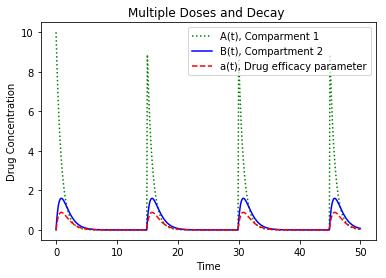

In [10]:
fig, ax = plt.subplots()
plt.plot(t,A,'g:',label='A(t), Comparment 1')
plt.plot(t,B,'b-',label='B(t), Compartment 2')
plt.plot(t,a,'r--', label = 'a(t), Drug efficacy parameter')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Drug Concentration')
plt.title('Multiple Doses and Decay ')